# Carolina Basketball Stats

This repository contains data from 2019-2024 gathered from [Sports Reference](https://www.sports-reference.com/cbb/schools/north-carolina/men/2019.html). We would like to visualize it a few ways.

To start, we need to make a concatenated dataframe of all years into one data source.

## Glossary
* __Rk__ -- *Rank*
* __Pos__ -- *Position*
* __G__ -- *Games*
* __GS__ -- *Games Started*
* __MP__ -- *Minutes Played*
* __FG__ -- *Field Goals*
* __FGA__ -- *Field Goal Attempts*
* __FG%__ -- *Field Goal Percentage*
* __3P__ -- *3-Point Field Goals*
* __3PA__ -- *3-Point Field Goal Attempts*
* __3P%__ -- *3-Point Field Goal Percentage*
* __2P__ -- *2-Point Field Goals*
* __2PA__ -- *2-Point Field Goal Attempts*
* __2P%__ -- *2-Point Field Goal Percentage*
* __eFG%__ -- *Effective Field Goal Percentage*
This statistic adjusts for the fact that a 3-point field goal is worth one more point than a 2-point field goal.
* __FT__ -- *Free Throws*
* __FTA__ -- *Free Throw Attempts*
* __FT%__ -- *Free Throw Percentage*
* __ORB__ -- *Offensive Rebounds*
* __DRB__ -- *Defensive Rebounds*
* __TRB__ -- *Total Rebounds*
* __AST__ -- *Assists*
* __STL__ -- *Steals*
* __BLK__ -- *Blocks*
* __TOV__ -- *Turnovers*
* __PF__ -- *Personal Fouls*
* __PTS__ -- *Points*

In [34]:
import pandas as pd

start_year = 2019
end_year = 2024

all_years = None

for year in range(start_year, end_year + 1):
    ## open dataframe
    year_df = pd.read_csv(f"heels_data/{year}.csv")
    ## add a column to the year
    year_df['year'] = year
    if all_years is not None:
        all_years = pd.concat([all_years, year_df])
    else:
        all_years = year_df

all_years

,Rk,Player,Pos,G,GS,MP,FG,FGA,FG%,3P,...,TRB,AST,STL,BLK,TOV,PF,PTS,Awards,Player-additional,year
0,1.0,Cameron Johnson,G,36,36.0,29.9,5.9,11.6,0.506,2.7,...,5.8,2.4,1.2,0.3,1.5,1.5,16.9,NaN,cameron-johnson-4,2019
1,2.0,Coby White,G,35,35.0,28.5,5.4,12.7,0.423,2.3,...,3.5,4.1,1.1,0.3,2.7,1.9,16.1,NaN,coby-white-1,2019
2,3.0,Luke Maye,F,36,36.0,30.9,5.5,12.8,0.430,1.0,...,10.5,2.3,0.6,0.6,2.0,2.6,14.9,NaN,luke-maye-1,2019
3,4.0,Nassir Little,F,36,0.0,18.2,3.6,7.6,0.478,0.4,...,4.6,0.7,0.5,0.5,1.3,1.6,9.8,NaN,nassir-little-1,2019
4,5.0,Kenny Williams,G,36,36.0,30.0,3.0,7.4,0.399,1.2,...,3.9,3.5,0.9,0.3,1.6,1.8,8.6,NaN,kenny-williams-3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,11.0,James Okonkwo,F,15,0.0,2.9,0.3,0.6,0.556,0.0,...,1.0,0.0,0.0,0.3,0.2,0.5,1.0,NaN,james-okonkwo-1,2024
11,12.0,Zayden High,F,23,0.0,4.5,0.3,0.8,0.316,0.0,...,1.1,0.1,0.2,0.1,0.4,1.0,0.8,NaN,zayden-high-2,2024
12,13.0,Duwe Farris,F,8,1.0,1.8,0.1,0.5,0.250,0.0,...,0.3,0.1,0.0,0.0,0.0,0.0,0.3,NaN,duwe-farris-1,2024
13,14.0,Creighton Lebo,G,9,1.0,2.4,0.0,1.0,0.000,0.0,...,0.3,0.0,0.2,0.0,0.0,0.2,0.0,NaN,creighton-lebo-1,2024


<Axes: xlabel='year'>

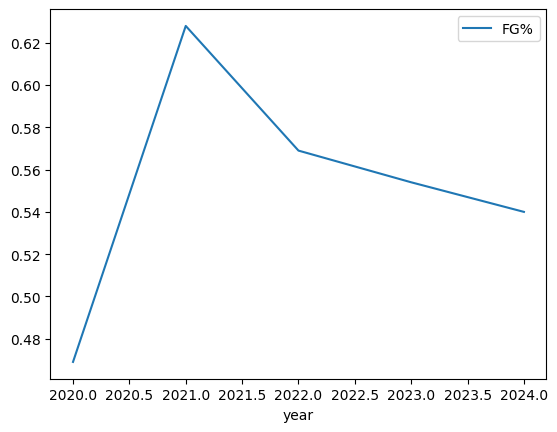

In [35]:
bacot = all_years[all_years["Player"] == "Armando Bacot"]
bacot.plot(x="year", y="FG%")

This is a nice static vis, but let's clean things up to make it a little prettier.

(0.0, 1.0)

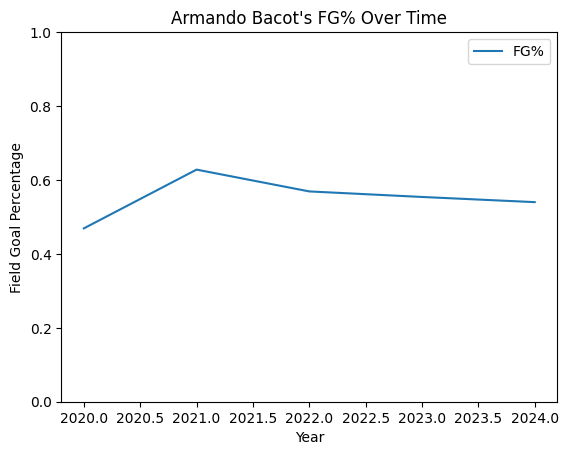

In [36]:
## remember, this returns a figure!
chart = bacot.plot(x="year", y="FG%")
chart.set_xlabel("Year")
chart.set_ylabel("Field Goal Percentage")
chart.set_title("Armando Bacot's FG% Over Time")
chart.set_ylim(0,1)


What if we wanted to make this interactive? Let's use widgets!

In [37]:
from ipywidgets import interact

columns = [column for column in list(bacot.columns) if "%" in column]

def make_bacot(column):
    chart = bacot.plot(x="year", y=column)
    chart.set_xlabel("Year")
    chart.set_ylabel(column)
    chart.set_title(f"Armando Bacot's {column} Over Time")
    chart.set_ylim(0,1)

interact(make_bacot, column=columns)

interactive(children=(Dropdown(description='column', options=('FG%', '3P%', '2P%', 'eFG%', 'FT%'), value='FG%'…

<function __main__.make_bacot(column)>

Let's make that even more interactive!

In [38]:
from ipywidgets import IntRangeSlider, Dropdown

## define my widgets
players = Dropdown(options=list(all_years["Player"]), description="Player", value="Armando Bacot")
date_range = IntRangeSlider(min=2019, max=2024, description="Year Range", step=1, value=(2019, 2024))\
## interact will automatically choose the best widget if you don't specify
## if I pass in this list, it will give me a dropdown by default
pct_columns = [column for column in list(all_years.columns) if "%" in column]

## define my function to run on interact
def player_percentage_timeseries(player, column, date_range):
    # implement player filter
    filtered = all_years[all_years["Player"] == player]
    # implement date filter
    filtered = filtered[filtered["year"] >= date_range[0]]
    filtered = filtered[filtered["year"] <= date_range[1]]
    # make years ints
    filtered["year"] = filtered["year"].astype(int)
    chart = filtered.plot(x="year", y=column)
    chart.set_xlabel("Year")
    chart.set_ylabel(column)
    chart.set_title(f"{player}'s {column} Over Time")
    chart.set_ylim(0,1)
    chart.set_xlim(filtered["year"].min(), filtered["year"].max())
    chart.set_xticks(list(filtered["year"]))

## create the interact
interact(player_percentage_timeseries, column=pct_columns, player=players, date_range=date_range)
    


interactive(children=(Dropdown(description='Player', index=20, options=('Cameron Johnson', 'Coby White', 'Luke…

<function __main__.player_percentage_timeseries(player, column, date_range)>

## Code In Class
This dataset also contains a `Team Totals` `Player` with the team totals per year.

Can you replicate the functionality in the cell above, but allow for the user to choose __2 players__ to compare, and include the __Team Totals__ line for reference? Use the following colors:

* `Team Totals`: `#EF426F`
* `Player 1`: `#7BAFD4`
* `Player 2`: `#13294B`


NOTE: Remember our slide about how `magic` can be dangerous? This is a great instance of exactly that. Our code above uses pandas plot to automatically generate a nice plot for us. But now that we want to get a little more complicated... it's hard! How do we add team totals as a reference line? How do we get multiple players on the same chart? A better approach might be to use `matplotlib` directly instead of relying on pandas to do the work for us!

In [39]:
import matplotlib.pyplot as plt

## define my widgets
player_1 = Dropdown(options=list(all_years["Player"]), description="Player", value="Armando Bacot")
player_2 = Dropdown(options=list(all_years["Player"]), description="Player", value="RJ Davis")
date_range = IntRangeSlider(min=2019, max=2024, description="Year Range", step=1, value=(2019, 2024))\
## interact will automatically choose the best widget if you don't specify
## if I pass in this list, it will give me a dropdown by default
pct_columns = [column for column in list(all_years.columns) if "%" in column]


def multi_player_percentage_timeseries(column, player_1, player_2, date_range):

    fig, axs = plt.subplots()

    lines = {
        player_1: '#7BAFD4',
        player_2: '#13294B',
        'Team Totals': '#EF426F'
    }

    for (key, color) in lines.items():
        # implement player filter
        filtered = all_years[all_years["Player"] == key]
        # implement date filter
        filtered = filtered[filtered["year"] >= date_range[0]]
        filtered = filtered[filtered["year"] <= date_range[1]]
        # make years ints
        filtered["year"] = filtered["year"].astype(int)
        filtered.sort_values("year")
        axs.plot(filtered["year"], filtered[column], color=color)


    
    axs.set_xlabel("Year")
    axs.set_ylabel(column)
    axs.set_title(f"{player_1} and {player_2} {column} Over Time")
    axs.set_ylim(0,1)
    axs.set_xlim(filtered["year"].min(), filtered["year"].max())
    axs.set_xticks(list(filtered["year"]))
    axs.legend(lines.keys())

## create the interact
interact(multi_player_percentage_timeseries, column=pct_columns, player_1=player_1, player_2=player_2, date_range=date_range)


interactive(children=(Dropdown(description='column', options=('FG%', '3P%', '2P%', 'eFG%', 'FT%'), value='FG%'…

<function __main__.multi_player_percentage_timeseries(column, player_1, player_2, date_range)>